# Exploratory Data Analysis

The main objective of this notebook are:

* Explore the data by performing univariate analysis
* Investigate the relationship between features and target variable `fies` by performing univariate and multivariate analysis
* Extract relavant insights from the dataset to share with stakeholders
* Understand the steps that will be required for ML pre-processing

To acheive the above objectives, the following tasks will be performed:
* Discovering
* Structuring
* Joining
* Validation
* Cleaning
* Presentation



**TASK**

* **Demographic description statistics**
* Report NaN based on primay production. ie. `"resp_islsproducer"`, `"resp_iscropproducer"`, and `"resp_isfishproducer"`.

* **Income and Shock**:
  - Investigate the most prevalent shock
  - Investigate the distribution by state.
  - _Report Main Shock reported (percentaga of household). Bar chart_
  - Investigate the main source of income.
  - Investigate the distribution by state.
  - Relationship between reduced income and income source

* **Crop (use only crop producing household)**
  - Statistic of crop producers and by state `"resp_iscropproducer"`
  - Most produced crop; by state
  - Most production difficulty experienced.-by state
  - `crp_proddiff_access_fertilzer` with target variable
  - `crp_proddiff_access_fertilzer` by state analysis
  - `crp_proddiff_access_fertilzer` and harvest area
  - crop area and harvest area.-by state
  - _Report Changes in crop area (percentage of crop producers) stacked bar chart_
  - _Report Changes in harvest area (percentage of crop producers) stacked bar chart_
  - _Crop producers reporting a drop in the area planted (by state) map_
  - Sales difficulty
  - Relationship between difficulty and fies
    

* **Livestock**
  - Statistic of livestock producers and by state `"resp_islsproducer"`
  - Most produced livestock
  - Most production difficulty experienced
  - _Livestock production difficulties (percentage of livestock producers) barchart_ 
  - Production Difficulty by state
  - Sales difficulty by state
  - Relationship between difficulty and fies
 
* **Fish**
  - Investigat the most difficulty experienced. `"resp_isfishproducer"`.
 
  - Engineer a new feature `any_production_difficulty`.
  - Engineer a new feature `any_sales_difficulty`.
  - Engineer a new feature `both_difficulty`.

* **Food Insecurity Experience Scale**
  - Distribution of states for different classes of $FI_{mod+sev}$(moderate or severe level) and $FI_{sev}$(severe).
  - By gender of hh house.
  - Relationship with shock
  - Relationship with income source
  - _Report the Prevalence of recent moderate or severe household food insecurity (FIES)_ map
  - _Food insecurity measures (by state)_


* Subset the columns required for regression and transform to formats ready for modelling.

* **Key highlights**

* **Recommendations**
  - Short term
  - Long Term

## Import Libraries and Packages

In [125]:
import pandas as pd
import numpy as np
from tableone import TableOne
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

# sns.set_theme(style="white")
sns.set_theme(style="white", palette="pastel")

In [126]:
# Load the dataset into the DataFrame
data = pd.read_csv("../data/fies_clean_data.csv")

## **Discovering**

In [127]:
data.head()

,country,state,local_govt_area,hh_agricactivity,hh_gender,hh_education,hh_size,hh_maritalstat,hh_age,resp_islsproducer,...,fcs_staple_days,fcs_pulses_days,fcs_vegetables_days,fcs_fruit_days,fcs_meat_fish_days,fcs_dairy_days,fcs_sugar_days,fcs_oil_days,fcs_condiments_days,income_main_cat
0,Nigeria,Zamfara,Talata Mafara,crop production,Male,Religious Education,18.0,2.0,41 to 65,No,...,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,Public employment
1,Nigeria,Zamfara,Bukkuyum,crop and livestock production,Male,Primary Education,9.0,2.0,41 to 65,Yes,...,7.0,3.0,7.0,0.0,0.0,0.0,0.0,3.0,3.0,Non-Agricultural wage and employment
2,Nigeria,Zamfara,Bukkuyum,crop and livestock production,Male,Primary Education,19.0,2.0,41 to 65,Yes,...,7.0,3.0,3.0,3.0,0.0,1.0,3.0,2.0,3.0,Production and sale of Ag produce
3,Nigeria,Zamfara,Talata Mafara,crop production,Male,Religious Education,14.0,2.0,41 to 65,No,...,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Production and sale of Ag produce
4,Nigeria,Zamfara,Talata Mafara,crop production,Male,Higher Education,12.0,2.0,41 to 65,No,...,7.0,3.0,4.0,0.0,2.0,0.0,0.0,7.0,0.0,Production and sale of Ag produce


### Data Distribution by State

In [128]:
state_counts = data["state"].value_counts(normalize=True)*100
state_counts

state
Zamfara    77.942459
Borno       6.306306
Katsina     5.405405
Adamawa     5.231037
Yobe        5.114792
Name: proportion, dtype: float64

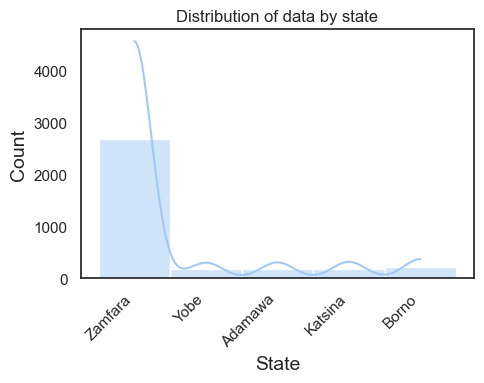

In [129]:
plt.figure(figsize=(5,4))


ax = sns.histplot(data = data, x="state", kde=True, bins=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of data by state")
plt.tight_layout();


**Observation**
* 78% of the dataset was collected from household in Zamfara. According to the metadata, data were collected at the level of local government areas in **Zamfara** and at state level (administrative level 1) in _Adamawa, Borno, Katsina and Yobe_.

**Impact**
* It is important to keep this in mind for rest of this analysis. One approach would be explored over and over performing analysis with Zamfara.

In [130]:
data.size

543678

**Observation**
Because of the size of the dataset, we are going to perform the EDA in different segments.
- Demographic
- Income and Shock
- Crop production and difficulty
- Livestock production and difficulty
- Food insecurity experience scale FIES.

## Household Demographic Characteristics
The household demographic characteristics will include the following variables
hh gender, State, education, income: source of income, agricultural activities, household size, hh age, production activities; livestocks only, crop only, ls and crop, land size


**Impact**


and 62.8% of household heads had no education or did not complete primary school. Additionally, on average, the rural households had 9.5 members. In terms of agricultural activities, 13.1% and 46.6% of the households participated in livestock and crop production, respectively, while 27.2% had both crop and livestock production. Shockingly, 22% of households reported no income, and the mean household income per member was AFN 2021 (USD ~22.7) in the past three months.




In [131]:
demo_cols = ["state","local_govt_area", "hh_agricactivity", "hh_gender",  "hh_education", 
             "hh_size", "hh_age", "income_main", "income_main_cat", "income_main_comp","crp_landsize_ha",
             "income_sec","income_third", "resp_islsproducer", "resp_iscropproducer", 
             "resp_isfishproducer","weight_final"]

demo_df = data.loc[:, demo_cols]


In [132]:
demo_df.head()

,state,local_govt_area,hh_agricactivity,hh_gender,hh_education,hh_size,hh_age,income_main,income_main_cat,income_main_comp,crp_landsize_ha,income_sec,income_third,resp_islsproducer,resp_iscropproducer,resp_isfishproducer,weight_final
0,Zamfara,Talata Mafara,crop production,Male,Religious Education,18.0,41 to 65,14.0,Public employment,5.0,4.0,1.0,3.0,No,Yes,Yes,0.198500
1,Zamfara,Bukkuyum,crop and livestock production,Male,Primary Education,9.0,41 to 65,11.0,Non-Agricultural wage and employment,1.0,1.0,19.0,19.0,Yes,Yes,No,0.187787
2,Zamfara,Bukkuyum,crop and livestock production,Male,Primary Education,19.0,41 to 65,4.0,Production and sale of Ag produce,1.0,1.0,19.0,19.0,Yes,Yes,No,0.187787
3,Zamfara,Talata Mafara,crop production,Male,Religious Education,14.0,41 to 65,1.0,Production and sale of Ag produce,5.0,3.0,19.0,19.0,No,Yes,Yes,0.198500
4,Zamfara,Talata Mafara,crop production,Male,Higher Education,12.0,41 to 65,1.0,Production and sale of Ag produce,5.0,3.0,3.0,10.0,No,Yes,Yes,0.198500


In [133]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                3441 non-null   object 
 1   local_govt_area      3441 non-null   object 
 2   hh_agricactivity     3441 non-null   object 
 3   hh_gender            3441 non-null   object 
 4   hh_education         3441 non-null   object 
 5   hh_size              3441 non-null   float64
 6   hh_age               3441 non-null   object 
 7   income_main          3441 non-null   float64
 8   income_main_cat      3441 non-null   object 
 9   income_main_comp     3441 non-null   float64
 10  crp_landsize_ha      3441 non-null   float64
 11  income_sec           3441 non-null   float64
 12  income_third         3441 non-null   float64
 13  resp_islsproducer    3441 non-null   object 
 14  resp_iscropproducer  3441 non-null   object 
 15  resp_isfishproducer  3441 non-null   o

Upon calling `.info()` on the dataframe we can observe the following:
* There is need to transform the variables into the right data types. For instance, `hh_agricactivity`
  which is reported as an `object` should be converted to a `category` dtype. Similarly, `income_main`
  which is reported as `float` should be be categorical. We shall refer to the metadata of the dataset
  to retrieve the appropiate labelling.

In [134]:
# Define utility function 
def data_type_converter(df:pd.DataFrame, exclude_col:list=None, dtype="object")->pd.DataFrame:
    """
    Convert object datatype columns in a DataFrame to category datatype.

    Args:
        df (pd.DataFrame): The input DataFrame containing object datatype columns.
        dtype (pd.DataFrame): The datatype to convert to
        

    Returns:
        pd.DataFrame: DataFrame with object datatype columns converted to category datatype.
    """
    # Select object columns
    if dtype == "object":
        object_columns = df.select_dtypes(include=[dtype]).columns
    
        # Convert object columns to category datatype
        df[object_columns] = df[object_columns].astype('category')
    else:
        float_columns = df.select_dtypes(include=[dtype]).drop(exclude_col, axis=1).columns
    
        # Convert object columns to category datatype
        df[float_columns] = df[float_columns].astype('category')
    
    return df


# Convert object to categorical type
demo_df = data_type_converter(demo_df)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   state                3441 non-null   category
 1   local_govt_area      3441 non-null   category
 2   hh_agricactivity     3441 non-null   category
 3   hh_gender            3441 non-null   category
 4   hh_education         3441 non-null   category
 5   hh_size              3441 non-null   float64 
 6   hh_age               3441 non-null   category
 7   income_main          3441 non-null   float64 
 8   income_main_cat      3441 non-null   category
 9   income_main_comp     3441 non-null   float64 
 10  crp_landsize_ha      3441 non-null   float64 
 11  income_sec           3441 non-null   float64 
 12  income_third         3441 non-null   float64 
 13  resp_islsproducer    3441 non-null   category
 14  resp_iscropproducer  3441 non-null   category
 15  resp_isfishproducer  

`.info()` shows that are 7 variables that are of type `float`. For instance `income_main_comp`.
However, as we shall see, this are actually discrete variables that should be categorical.

In [135]:
demo_df["income_main_comp"].value_counts()

income_main_comp
4.0    1319
2.0     736
5.0     666
1.0     436
3.0     284
Name: count, dtype: int64

In [136]:
# Convert float type to category
demo_df = data_type_converter(demo_df, ["hh_size", "crp_landsize_ha", "weight_final"], dtype="float64")
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   state                3441 non-null   category
 1   local_govt_area      3441 non-null   category
 2   hh_agricactivity     3441 non-null   category
 3   hh_gender            3441 non-null   category
 4   hh_education         3441 non-null   category
 5   hh_size              3441 non-null   float64 
 6   hh_age               3441 non-null   category
 7   income_main          3441 non-null   category
 8   income_main_cat      3441 non-null   category
 9   income_main_comp     3441 non-null   category
 10  crp_landsize_ha      3441 non-null   float64 
 11  income_sec           3441 non-null   category
 12  income_third         3441 non-null   category
 13  resp_islsproducer    3441 non-null   category
 14  resp_iscropproducer  3441 non-null   category
 15  resp_isfishproducer  

In [137]:
demo_df.head()

,state,local_govt_area,hh_agricactivity,hh_gender,hh_education,hh_size,hh_age,income_main,income_main_cat,income_main_comp,crp_landsize_ha,income_sec,income_third,resp_islsproducer,resp_iscropproducer,resp_isfishproducer,weight_final
0,Zamfara,Talata Mafara,crop production,Male,Religious Education,18.0,41 to 65,14.0,Public employment,5.0,4.0,1.0,3.0,No,Yes,Yes,0.198500
1,Zamfara,Bukkuyum,crop and livestock production,Male,Primary Education,9.0,41 to 65,11.0,Non-Agricultural wage and employment,1.0,1.0,19.0,19.0,Yes,Yes,No,0.187787
2,Zamfara,Bukkuyum,crop and livestock production,Male,Primary Education,19.0,41 to 65,4.0,Production and sale of Ag produce,1.0,1.0,19.0,19.0,Yes,Yes,No,0.187787
3,Zamfara,Talata Mafara,crop production,Male,Religious Education,14.0,41 to 65,1.0,Production and sale of Ag produce,5.0,3.0,19.0,19.0,No,Yes,Yes,0.198500
4,Zamfara,Talata Mafara,crop production,Male,Higher Education,12.0,41 to 65,1.0,Production and sale of Ag produce,5.0,3.0,3.0,10.0,No,Yes,Yes,0.198500


### **Agricultural Activities `hh_agricactivity` by state**

In [138]:
def compute_groupby(df:pd.DataFrame, col1:str, col2:str)->pd.DataFrame:
    """
    Calculate the percentage of occurrences for two categorical variables in a DataFrame.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        col1 (str): The name of the first categorical variable.
        col2 (str): The name of the second categorical variable.

    Returns:
        DataFrame: A DataFrame with the percentage of occurrences for each category of col2 
        within each category of col1.

    Example:
        calculate_percentage_for_two_cat_variables(df, 'state', 'income_more_than_one')
    """
    # Groupby the DataFrame to have a new column count
    grp_df = df.groupby([col1, col2], observed=False).agg(
        count=pd.NamedAgg(column=col2, aggfunc="size")
    ).reset_index()

    # Pivot the DataFrame to have col1 as rows and col2 as columns
    pivot_df = grp_df.pivot(index=col1, columns=col2, values='count')

    # Calculate the percentage of each category within each category of col1
    pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

    return pivot_df_percentage


In [216]:
def plot_grouped_data(pivot_df_percentage:pd.DataFrame, **kwargs:dict)->None:
    # Plot the stacked bar chart
    ax = pivot_df_percentage.plot(kind='barh', stacked=kwargs["stacked"], width=0.8, figsize=(12, 5))
    
    
    plt.title(kwargs["title"])
    plt.legend(title=kwargs["legend_title"], bbox_to_anchor=(1.05, 1), loc='upper left')

    # Remove x-axis ticks
    ax.xaxis.set_ticks([])
    # Remove y_label
    ax.set_ylabel("")
    
    # Annotate each bar with the percentages for each category
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        y,x = p.get_xy()
        ax.annotate(f'{width:.1f}%', (width, x + height / 2), ha='left', va='center', fontsize=8)

    
    plt.tight_layout()
    plt.show()

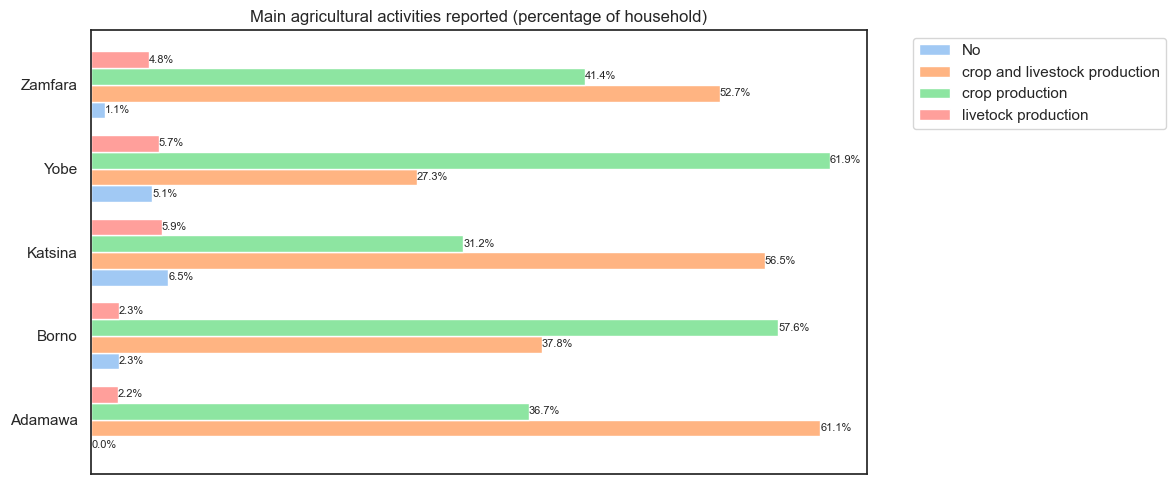

In [217]:
pivot_df_percentage_hh_agricactivity = compute_groupby(demo_df, "state", "hh_agricactivity")

plot_grouped_data(pivot_df_percentage_hh_agricactivity,stacked=False,
                  title="Main agricultural activities reported (percentage of household)", legend_title="")

### **Demography Income by State**

Create a new column  `income_more_than_one`: This represents a column for houshold with more than one income.

In [218]:
# Has more than one income
# Extract values of the three income source columns
income_values = demo_df[['income_main', 'income_sec', 'income_third']].values

# check if any of the values is not 19
income_not_19 = income_values != 19.0

# Check if at least two income sources are not equal to 19
more_than_one_income = np.sum(income_not_19, axis=1) > 1

# # Map boolean values to 'Yes' or 'No'
demo_df["income_more_than_one"] = np.where(more_than_one_income, 'Yes', 'No')

demo_df[["income_main", "income_sec", "income_third", "income_more_than_one"]].sort_values(by="income_main", ascending=False).head()

,income_main,income_sec,income_third,income_more_than_one
743,19.0,19.0,19.0,No
2117,19.0,19.0,19.0,No
169,19.0,19.0,19.0,No
1522,19.0,19.0,19.0,No
80,19.0,19.0,19.0,No


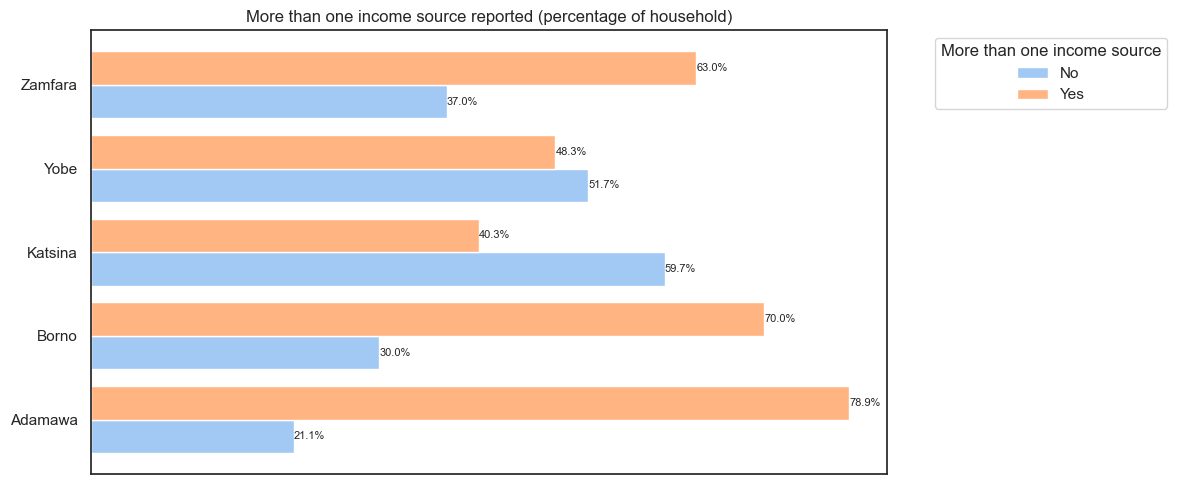

In [219]:
# Compute the pivot
pivot_df_percentage_hh_agricactivity = compute_groupby(demo_df, "state", "income_more_than_one")

# Plot the bar plot of household with more than one income by state
plot_grouped_data(pivot_df_percentage_hh_agricactivity, stacked=False,
                  title="More than one income source reported (percentage of household)",
                 xlabel="State", legend_title='More than one income source')


#### **Increase or Decrease in Main Source `income_main_comp`**

In [220]:
demo_df.income_main_comp.value_counts(normalize=True)

income_main_comp
4.0    0.383319
2.0    0.213891
5.0    0.193548
1.0    0.126707
3.0    0.082534
Name: proportion, dtype: float64

The values of of `incone_main_comp` are discrete values that ranges from 1-5:

'1' being income increase by more than 50% and '5' being income reduces by half as much.
```
{1: "A lot more",
2: "Slightly more",
3: "Same",
4: "Slightly less",
5: "A lot less"}
```

Because these values are discrete, the values shall be recoded into two groups; `increase income` and `decrease income`

In [221]:
demo_df2 = demo_df.copy()
conditions = [demo_df2["income_main_comp"].isin([1,2]), demo_df2["income_main_comp"].isin([4,5])]
choices = ['Increased', 'Decreased']
result =  pd.Categorical(np.select(conditions, choices, default="Same"))

demo_df2.insert(9, 'income_main_comp2', result)

In [222]:
# Main source of income compare
demo_df2["income_main_comp2"].value_counts(normalize=True) * 100

income_main_comp2
Decreased    57.686719
Increased    34.059866
Same          8.253415
Name: proportion, dtype: float64

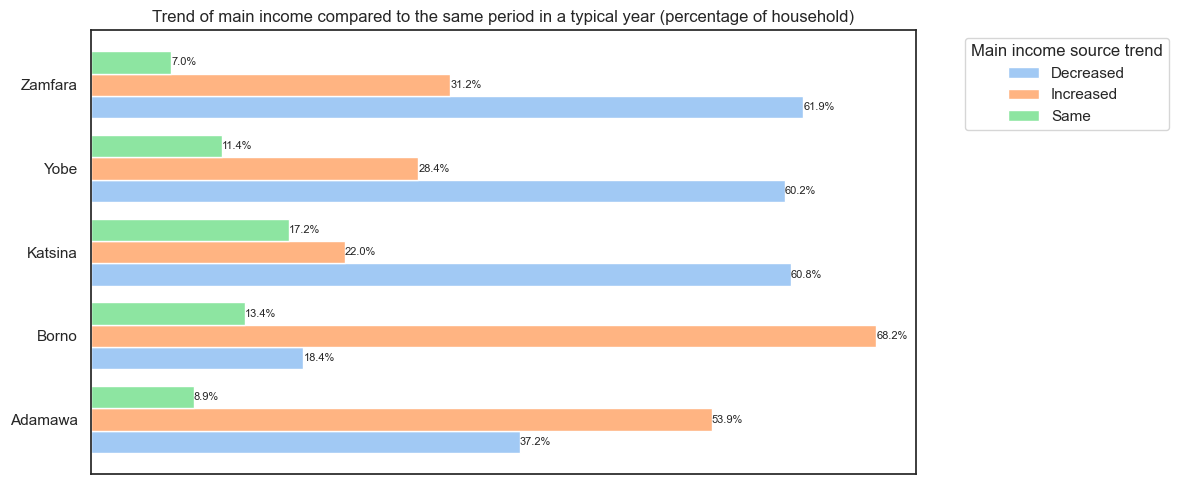

In [223]:
# Compute the pivot
pivot_df_percentage_hh_income_comp = compute_groupby(demo_df2, "state", "income_main_comp2")

# Plot the bar plot of household with more than one income by state
plot_grouped_data(pivot_df_percentage_hh_income_comp, stacked=False,
                  title="Trend of main income compared to the same period in a typical year (percentage of household)",
                 legend_title='Main income source trend')

**Observation**
* A decrease in the main source of income was reported by ~58 percent of the households in
the three months preceding the survey, compared to the same period in a typical year.
* A reduction in main income was experienced in Zamfara (~ 62 percent), Yobe (~ 60 percent),
and Katsina (~ 61 percent).
* An increase in main income as experienced in Borno (~ 62 percent) and Adamawa (~ 54 percent)

#### Source of Main Income `income_main`

* What percentage of household recorded no source of income?

In [224]:
def calculate_groupby_percentage(df: pd.DataFrame, group_col: str) -> pd.DataFrame:
    """
    Calculate the percentage of each group in a DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        group_col (str): Name of the column to group by.
        count_col (str): Name of the column containing the count.

    Returns:
        pd.DataFrame: DataFrame with percentage calculated.
    """
    # Group by the specified column and calculate count
    group_count = df.groupby(group_col, observed=False).agg(
        count=pd.NamedAgg(column=group_col, aggfunc="count")
    ).reset_index()

    # Calculate total count of all groups
    total_count = group_count['count'].sum()

    # Calculate percentage of each group
    group_count['percentage'] = round((group_count['count'] / total_count) * 100, 2)

    return group_count


In [225]:
def plot_group_by_percentage(grp_df: pd.DataFrame, grp_by_col:str, **kwargs) -> None:
    """
    Plot the distribution of grouped variable.

    Args:
        grp_df (pd.DataFrame): DataFrame containing the percentage of each grouped variable.

    Returns:
        None
    """
    # Create the bar plot
    plt.figure(figsize=(10,5))
    ax = sns.barplot(data=grp_df, 
                     y=grp_by_col,
                     x="percentage", 
                     order=grp_df.sort_values("count", ascending=False)[grp_by_col])
    
    # Add percentage labels to the bars
    ax.bar_label(ax.containers[0], fontsize=8, fmt='%1.1f%%')  # Add '%'
    
    # Remove x-axis ticks and labels
    ax.xaxis.set_ticks([])
    ax.set_xlabel("")
    
    # Set y-axis label and plot title
    ax.set_ylabel(kwargs["ylabel"])
    ax.set_title(kwargs["title"])
    
    # Show the plot
    plt.show()



In [226]:
# main income source by percentage
income_grp_count=calculate_groupby_percentage(demo_df2, "income_main")
# plot_group_by_percentage(income_grp_count, 
#                          "income_main", 
#                           ylabel="Main Income Source",
#                          title="Main source of income (percentage of household)")


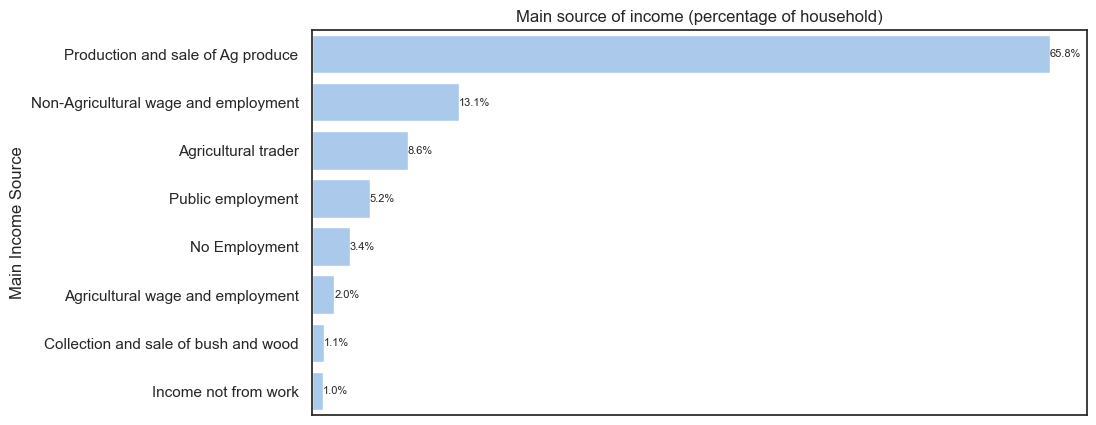

In [227]:
# 
income_main_cat_grp_count=calculate_groupby_percentage(demo_df2, "income_main_cat")

plot_group_by_percentage(income_main_cat_grp_count, 
                         "income_main_cat", 
                          ylabel="Main Income Source",
                         title="Main source of income (percentage of household)")

**Observation**
* Sixty-six percent of the surveyed households reported 'Production and sale of agricultural produce' as their `income_main`
* Approximately 4% and 1% reported as 'Unemployed' and 'Income not from work' respectively
* 5.2% and 13.1% of the household get their income from 'Public Employment' and 'Non-Agricultural wage and employment' respectively.

**How does `income_main`(primary source of income) relates with increase of decrease `income_main_comp`?**

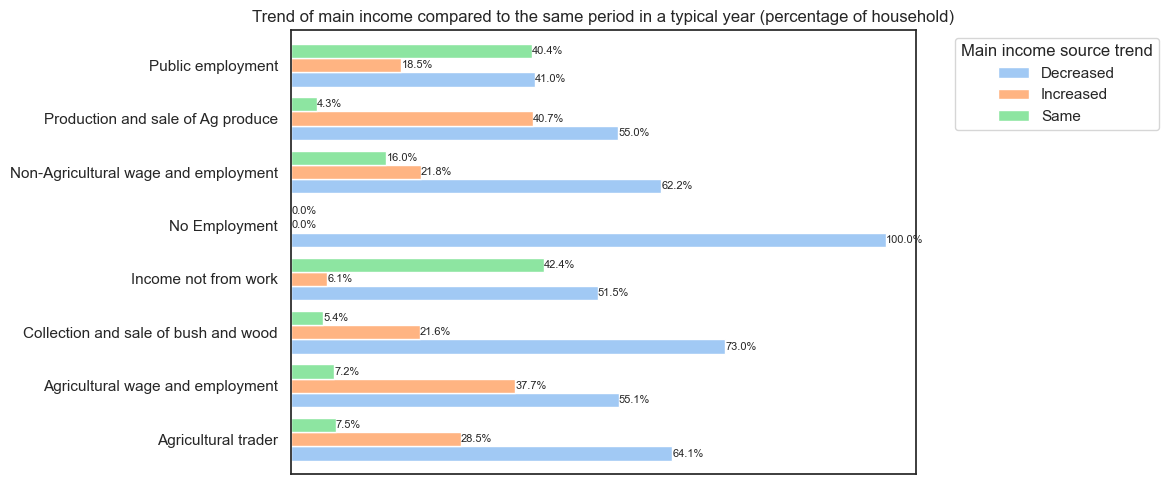

In [228]:
# Compute the pivot
percent_pivot_income_src_by_income_comp = compute_groupby(demo_df2, "income_main_cat", "income_main_comp2")

# Plot the bar plot of household with more than one income by state
plot_grouped_data(percent_pivot_income_src_by_income_comp, stacked=False,
                  title="Trend of main income compared to the same period in a typical year (percentage of household)",
                 legend_title='Main income source trend')

**Observation**
* The households that experienced the most significant reduction (decrease) besides 'No Employement' in main income were those whose main income was collection and sale of bush and wood (73%).
* 
